In [139]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [140]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer



In [141]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [142]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1389892,B000ILII5K,The Tin Flute,NaN,A3QY27FQHK453B,"lisatheratgirl ""lisatheratgirl""",6/6,5.0,1141171200,canadian classic,It's really too bad that Canadian authors aren...
1707192,1552630277,eXistenZ: A Graphic Novel,NaN,A3NEFFZBEWLIBS,Ophiuchus,1/2,1.0,1124236800,Inexcuseably amatuerish,"eXistenZ was a very good movie, but the book v..."
1630447,B000AYI0JY,Moby-Dick or The Whale,NaN,A28Z4GO99SMXOK,"andronicus ""thom""",0/0,5.0,1354492800,superb edition,wish looa would also issue a volume of complet...
622702,B0006W78ZC,God calling,NaN,NaN,NaN,9/11,5.0,1084406400,A Wonderful Gift to Give to Yourself and Others!,I have read God Calling several times over the...
152247,0807826367,The Free State of Jones: Mississippi's Longest...,NaN,A315LGFSF696DD,"Dr. David R. Evans ""Dr. Dave""",1/8,3.0,1250985600,Ehhh.....,Calling one county in the whole state of Missi...
2843538,B000GSDG8E,"Rich Dad, Poor Dad",NaN,AZBMYG1KETWWI,K. Suh,3/3,2.0,1238976000,"A good starting point, but a real financial ed...","If there's one thing this book doesn't do, is ..."
2330552,B0006AG81E,"The tragedy of Romeo and Juliet, (The Tudor Sh...",NaN,AK84A1UWUS5D6,Luis Paniagua,1/1,5.0,1114300800,The play in my thoughts,This tragic tale of Romeo and Juliet is one of...
1851289,B000N63R0Q,"Master of the Senate: the Years of LBJ, Vol. III",NaN,A2G7679ERPB7HR,Wippy,0/0,4.0,1344384000,Class,The skillful weaving together of multitudinous...
374825,B000IAT06W,The Old Man and the Sea,NaN,A4N4W6AIL9FBN,Constantin,0/0,5.0,1333497600,Great book! Quick delivery!,Amazing book! Highly recommended! It is an cap...
2088188,0878919031,CLEP Introductory Sociology (CLEP Test Prepara...,18.45,A13N3MYRITREE6,"C. Cramasta ""*Bella*""",1/1,4.0,1211241600,great book for clep; not enough info,OK the book is great as far as about 1/2 of th...


In [143]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [144]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
170503,Dancing with the Beloved,Let Us Dance! The Stumble And Whirl With The B...,['Chelan Harkin'],http://books.google.com/books/content?id=6mOKz...,http://books.google.com/books?id=6mOKzgEACAAJ&...,NaN,2021-07-03,http://books.google.com/books?id=6mOKzgEACAAJ&...,NaN,NaN
13228,The colonial background of the American revolu...,A penetrating treatise of Colonial development...,['Charles McLean Andrews'],http://books.google.com/books/content?id=sHq2I...,http://books.google.nl/books?id=sHq2IYgfcLUC&p...,Yale University Press,1961-01-01,http://books.google.nl/books?id=sHq2IYgfcLUC&d...,['History'],NaN
168641,Newspaper Days 1899-1906,It has been said that If you can read a recipe...,['Henry Louis Mencken'],http://books.google.com/books/content?id=HAZbA...,http://books.google.com/books?id=HAZbAAAAMAAJ&...,NaN,1996,http://books.google.com/books?id=HAZbAAAAMAAJ&...,['Biography & Autobiography'],2.0
2781,Limpy's Homemade Sausage for the Hunter and th...,Limpy's Homemade Sausage explains how to make ...,['S. G. Pierce'],http://books.google.com/books/content?id=KqYGA...,http://books.google.nl/books?id=KqYGAAAACAAJ&d...,Frank Amato Publications,1998-12-01,http://books.google.nl/books?id=KqYGAAAACAAJ&d...,['Cooking'],NaN
164224,Shakti and Shakta,"Agama, which governs according to its follower...",['John Woodroffe'],http://books.google.com/books/content?id=lgd3K...,http://books.google.com/books?id=lgd3KWT0x7QC&...,Nuvision Publications,2007-04,http://books.google.com/books?id=lgd3KWT0x7QC&...,['Religion'],NaN
196033,The Golden Ass (Oxford World's Classics),"The Golden Ass is a unique, entertaining, and ...","['Apuleius,']",http://books.google.com/books/content?id=rz78D...,http://books.google.com/books?id=rz78DwAAQBAJ&...,Oxford Paperbacks,2008-04-17,http://books.google.com/books?id=rz78DwAAQBAJ&...,['Literary Collections'],NaN
152119,A Bolt of White Cloth,NaN,['Leon Rooke'],NaN,http://books.google.com/books?id=X-5qQgAACAAJ&...,"Don Mills, Ont. : Stoddart",1984-01-01,http://books.google.com/books?id=X-5qQgAACAAJ&...,['Canadian fiction'],NaN
132510,Cases in Qualitative Research: Research Report...,This collection of research articles illustrat...,['Andrea K Milinki'],http://books.google.com/books/content?id=kVD0D...,http://books.google.com/books?id=kVD0DAAAQBAJ&...,Routledge,2016-09-01,https://play.google.com/store/books/details?id...,['Psychology'],NaN
60153,The Burgess animal book for children,Introduces the habits and characteristics of m...,['Thornton Waldo Burgess'],http://books.google.com/books/content?id=qEcCA...,http://books.google.com/books?id=qEcCAAAAYAAJ&...,NaN,1920,https://play.google.com/store/books/details?id...,['Animal behavior'],NaN
24559,SAP R/3 Reporting & eBusiness Intelligence,"""SAP R/3 Reporting"" shows how to deliver effec...","['Thomas Aidan Curran', 'Andrew Ladd', 'Dennis...",http://books.google.com/books/content?id=mqxWA...,http://books.google.com/books?id=mqxWAAAAYAAJ&...,Prentice Hall PTR,2000,http://books.google.com/books?id=mqxWAAAAYAAJ&...,['Computers'],NaN


In [145]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [146]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [222]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: User_id provides same information.
#   - Id: Innecesary column.
#   - review/helpfulness: Unncesary column for current analysis
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title 
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName','Price','review/helpfulness','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [223]:
df_rating_processed.sample(10)

,Title,User_id,review/score,review/time,review/text
1973862,The Cat Who...Cookbook (Updated),A2T5E533BA239M,3.0,1002844800,Definitely for Cat Who Fanatics. This book is ...
956675,The Animal Hour,A1ZBZV8AGT77TR,1.0,890438400,"Unfortunately, I bought into the advertising a..."
2390692,Isolation Ward,A2S655MRJ5KJLZ,4.0,1140739200,Isolation Ward--the debut novel by a current m...
2063680,Glory Road,A1TMG47HQF75AD,5.0,1034467200,"Unlike most of Heinlein's work, this doesn't s..."
145790,Terra Incognita: Travels in Antarctica,NaN,5.0,923270400,Living in a city known for it's balmy and mild...
2054427,The Hobbit There and Back Again,A35R4BWJ34PH71,5.0,1357689600,I read this Tolkien book a long time ago and r...
1578599,Keep It On The Down Low: Nobody Has To Know,A3V4TYDGS39E92,5.0,1139875200,I was so entranced by this book. The character...
458721,The Shih Tzu Handbook (Barron's Pet Handbooks),A10BRG20Z10GJN,4.0,1176163200,The Shih Tzu Handbook is a great introduction ...
1737346,Beyond Technical Analysis: How to Develop and ...,AIEY4Q2XL49ES,5.0,1290038400,This is an excellent source of trading knowled...
1920445,Unknown Man #89,A1D3U9VWHPBRJC,4.0,1202601600,This is one of the first books I purchased for...


In [224]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title', 
                                                        'User_id':'user_id',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/summary': 'summary',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [225]:
df_rating_processed.isna().sum()

title             208
user_id        561787
review              0
review_time         0
text                8
dtype: int64

In [226]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [227]:
#CLEAN THE DATASETS

In [228]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['title', 'text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [229]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
173360,Roman Homosexuality: Ideologies of Masculinity...,['City University of New York Craig A. William...,"Oxford University Press, USA",1999-05-12,['Social Science']
110885,Billibub Baddings and the Case of the Singing ...,['Tee Morris'],Calgary : Dragon Moon Press,2004,['Fiction']
174924,Interpreters of Judaism in the Late Twentieth ...,['Steven T. Katz'],Bnai Brith International Continuing,1993,['Religion']
210857,Ultimate Guide to Longarm Machine Quilti: How ...,['Linda V. Taylor'],C&T Publishing Inc,2010-11-05,['Crafts & Hobbies']
122969,Christopher Wood: An English Painter,['Richard Ingleby'],NaN,1995,['Artists']


In [231]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [232]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [233]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [234]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
48126,American Grotesque: An Account of the Clay Sha...,['James Kirkwood'],Perennial,['Law'],1992
101191,Sequoia & Kings Canyon National parks recreati...,['Mike White'],Wilderness Press,['Travel'],2012
137734,Stories and poems of Edgar Allan Poe (A classi...,NaN,NaN,['Literature'],2000
193451,Elf: Buddy's Little S(Elf) Help Book,['Buddy Hobbs'],NaN,['Juvenile Fiction'],2003
174959,Beginning Unix (Programmer to Programmer),"['Paul Love', 'Joe Merlino', 'Craig Zimmerman'...",John Wiley & Sons,['Computers'],2015
98181,"A Chalice of Wind (Balefire, No. 1)",['Cate Tiernan'],Penguin,['Young Adult Fiction'],2005
101350,"The American heritage history of World War I,",['Stephen E. Ambrose'],Viking Adult,['History'],1997
200692,Sensory Processes,['Lawrence Marks'],Elsevier,['Science'],2014
180201,God's Word for Today: Genesis -- Rooted in Rel...,['Concordia Publishing House'],NaN,['Religion'],1994
154885,The Human Revolution: Volume 1,['Daisaku Ikeda'],Middleway Press,['Religion'],2017


In [235]:
#Updating the Authors to a list.
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: [author for author in str(x).split(",")] if pd.notna(x) else None)

In [236]:
#Updating Categories to list
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: [category for category in str(x).split(",")] if pd.notna(x) else None)

In [237]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [238]:
df_rating_processed.sample(5)

,title,user_id,review,review_time,text
2117803,Flood Tide (Dirk Pitt),A2LJEPTUXHOIEE,2.0,1030320000,Withstanding the fact that this is a work of f...
2379169,Where's Waldo?,A1OWROUH26FJXV,5.0,1308873600,my girls loved the book and want me to purchas...
531671,Freak The Mighty,NaN,4.0,1118102400,this book is very good although it may make yo...
2470788,Great Expectations,NaN,5.0,915494400,"This may be Dickens' finest novel, for while i..."
1269091,The Liberal Mind: The Psychological Causes of ...,A1IPL1405R37Q4,5.0,1208908800,A primer into how humans cooperate in simple a...


In [239]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [240]:
df_rating_processed.sample(10)

,title,user_id,review,text,review_year
2881865,Home Inspection Business From A to Z: Real Est...,A1T6PXM2M3N84A,5.0,This is a truly eye-opening book that I would ...,2003
1673634,Anne Frank the Diary of a Young Girl,NaN,5.0,allthough at times you get confused...it is on...,2003
1427592,The Complete Guide to Second Homes for Vacatio...,A3KRAO10YOOWG4,5.0,"As a voracious reader of books in real estate,...",2000
1423847,Has A Child Been Molested?,A29GAJVA8Q1EF8,5.0,Dr.Coleman's book provided me valuable insight...,2000
62789,Petersburg,A2U5B8JHA0DTOC,4.0,I have to believe there is a better translatio...,2006
1724420,"Rees Howells, Intercessor",A182D4799ZXOZQ,5.0,When I first read this book I had to reread se...,2000
1273752,Your Marketing Sucks.,NaN,5.0,"Yes, you can debate the title. (I liked it, bu...",2003
2136164,Odd Thomas,A2K5YFTEEOFZHP,4.0,This was the first Dean Koontz book I have rea...,2007
1822119,The Wapshot Chronicle,A1F3DFRPGVEUI8,5.0,"""The Wapshot Chronicle,"" the first of John Che...",2009
1428367,What's a Girl to Do?: While Waiting for Mr. Right,A1ETXBQM0GYD4T,2.0,I don't know what book the other reviewers rea...,2007


In [241]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 183.1+ MB


In [242]:
df_all_data_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
20798,1984,A2PM7FW4PK3VJ4,5.0,"George Orwell's ""1984"" is the greatest politic...",2012,[George Orwell],Singel Uitgeverijen,[Fiction],2013
2136534,The Princess Diaries,AMI0NWAGPZ6RW,5.0,Mia Thermopolis is your average ninth grader w...,2004,[Meg Cabot],HarperTeen,[Juvenile Fiction],2008
97972,The Stranger,AQ42NKX17WLYT,5.0,Jean-Paul Sartre suggests in his essay on Camu...,2006,[Harlan Coben],Orion,None,2016
2550940,Taking Charge of Your Fertility: The Definitiv...,A1NIHIEYCDXT38,4.0,I FOUND THIS BOOK HAD USEFUL INFORMATION ON LE...,2002,[Toni Weschler],Random House,[AReproductive health],2003
1206043,Their Eyes Were Watching God,A21VR7M8O55EF6,5.0,I loved this 1937 novel by Zora Neale Hurston....,2005,[Zora Neale Hurston],Prabhat Prakashan,[Reference],2020
1484573,S Is For Silence,A39ABKRS1MKFTW,4.0,I have enjoyed Sue Grafton's alphabet series f...,2006,[Sue Grafton],Pan Macmillan,[Fiction],2009
967560,The Lord of the Rings: The Fellowship of the R...,NaN,1.0,Im a nerd...and Ive heard this is the nerd bib...,1999,None,NaN,None,2002
2130269,The White Mountains,AQ6WUO0ND3JMC,5.0,i read this series when i was in elementary sc...,2011,[John Christopher],Simon and Schuster,[Juvenile Fiction],2014
100216,The Stranger,A3QAZAWSD2A34U,3.0,"OK, i will make two reviews of this book and y...",2010,[Harlan Coben],Orion,None,2016
1730401,Amelia Bedelia: Peggy Parish (Novel units),A1H3S4KTB6QJ8H,5.0,"Amelia Bedelia is a well-meaning maid, who tak...",2002,[Mary Bolte],Teacher Created Resources,[Education],1997


In [243]:
df_all_data_processed['title'].value_counts().count()

188353

In [219]:
#Remove books with less than 50 reviews
# N = 50
# value_counts = df_all_data_processed['title'].value_counts()
# elements_with_less_than_N_entries = value_counts[value_counts < N].index
# len(elements_with_less_than_N_entries)

# df_famous_books_data_processed = df_all_data_processed[~df_all_data_processed['title'].isin(elements_with_less_than_N_entries)]
# df_famous_books_data_processed.info()
# df_famous_books_data_processed['review'].value_counts()

180789

In [214]:
df_all_data_processed['review'].value_counts()

review
5.0    1607092
4.0     520540
3.0     225657
1.0     178815
2.0     134210
Name: count, dtype: int64

In [185]:
df_all_data_processed.to_csv('../data/processed/all_data_processed.csv')

In [184]:
df_all_data_processed.isna().sum()

title                  0
user_id           499719
review                 0
text                   0
review_year            0
authors            57162
publisher         448934
categories        217818
published_year         0
dtype: int64

In [27]:
df_all_data_processed[df_all_data_processed['title']=='The Hobbit']

,title,user_id,review,text,review_date,authors,publisher,categories,published_year
553564,The Hobbit,NaN,5.0,this is a great book. i say *is* because i hav...,2002-08-19,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
553565,The Hobbit,A3E9WR9GH1HFT0,5.0,I love this book. I am 13 &amp; I read all the...,2002-01-30,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
553566,The Hobbit,A13DFLTGGGJLWN,4.0,I physically looked this book over in a store ...,2008-01-20,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
553567,The Hobbit,AV4Y360SJ4PHP,1.0,"I downloaded my favorite book, the Hobbit to m...",2012-12-19,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
553568,The Hobbit,A2M7RJZQPYN4PI,3.0,Minuses:1. Too many margin comments on the rev...,2008-01-15,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
...,...,...,...,...,...,...,...,...,...
575582,The Hobbit,AGMSR3RGOCYEI,5.0,I was inspired to reread Tolkien's &#34;the Ho...,2013-02-07,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
575583,The Hobbit,A2APZUY5HK7CDT,5.0,This novel is action packed full of fun and ad...,2013-02-07,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
575584,The Hobbit,A3CX6FLUJFOAZZ,5.0,T h I s I s a m a z I n g a n d g r e a t and ...,2013-02-07,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
575585,The Hobbit,A12I6YHESO0KFB,5.0,"Still holds up after all these years,a true cl...",2013-02-07,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012


In [28]:
df_rating_processed.shape

(2999784, 5)

In [29]:
df_data_processed.shape

(188353, 5)

In [30]:
df_rating_processed['review/score'].value_counts()

KeyError: 'review/score'

In [ ]:
df_rating_processed['review/score'].describe()

count    3.000000e+06
mean     4.215289e+00
std      1.203054e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: review/score, dtype: float64

<Axes: >

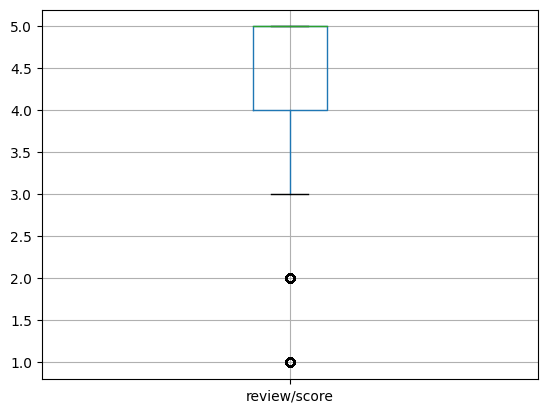

In [ ]:
df_rating_processed.boxplot(column=['review/score'])

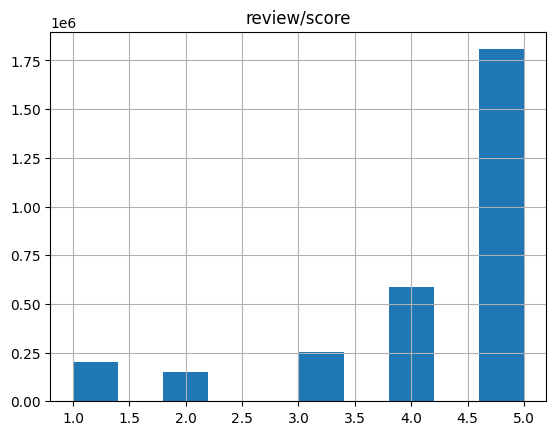

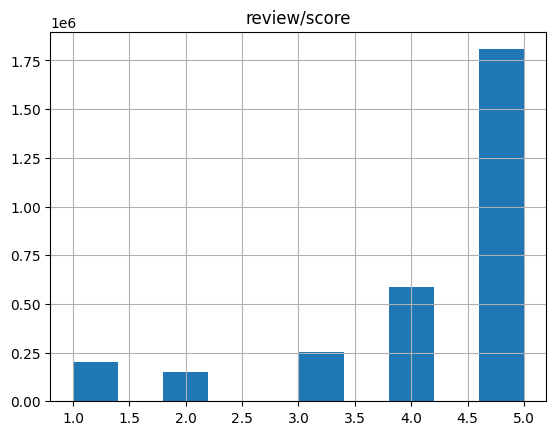

In [ ]:
df_rating_processed.hist(column=['review/score'])
plt.show()

In [ ]:
df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review/score'].mean()

4.657131181038006

In [ ]:
df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review/score'].describe()

count    22023.000000
mean         4.657131
std          0.800452
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64

In [ ]:

df_rating_processed[df_rating_processed['Title']== 'Atlas Shrugged']['review/score'].describe()

count    12513.000000
mean         4.028690
std          1.418635
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64